# **Máquinas de Soporte Vectorial**

Jonnatan Arias Garcia

email: jonnatan.arias@utp.edu.co - jariasg@uniquindio.edu.co

## Objetivos:

*    Identificar los elementos de las máquinas de soporte vectorial y su labor.
*   Apropiarse de una estrategia de sintonización de parámetros libres de los modelos empleando técnicas de validación.




In [ ]:
import numpy as np
from time import sleep

from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs,  load_digits
from sklearn.model_selection import train_test_split, StratifiedKFold
from IPython.display import clear_output
import matplotlib.pyplot as plt


## Funciones auxiliares

Crean las bases de datos y hacen las gráficas

In [ ]:
def linear():
  X, y = make_blobs(n_samples=100, centers=2, random_state=6)

  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

  N = X_train.shape[0]
  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

  return X_train,y_train,X_test,y_test,X_grid

def easy():
  #Load database
  X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
  rng = np.random.RandomState(50)
  X += 3 * rng.uniform(size=X.shape)

  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)


  N = X_train.shape[0]
  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

  return X_train,y_train,X_test,y_test,X_grid


def moons():
  #Load database
  X, y = make_moons(noise=0.2, random_state=10,n_samples=400)

  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)


  N = X_train.shape[0]
  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

  return X_train,y_train,X_test,y_test,X_grid

def blobs():
  #Load database
  X, y = make_blobs(n_samples=200, centers=2, random_state=0)
  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

  return X_train,y_train,X_test,y_test,X_grid

def three_blobs():
  #Load database
  X, y = make_blobs(n_samples=500, centers=3, random_state=2)
  y = y==2

  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

  return X_train,y_train,X_test,y_test,X_grid

def circles():
  #Load database
  X, y = make_circles(n_samples=1000, factor=.5,  noise=.1)
  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

  return X_train,y_train,X_test,y_test,X_grid

def plot_svm(X_train,t_train,X_test,t_test,X_grid=None,y_grid=None,boundaries=None,supports=None):

  if X_grid is not None:
    X1 = X_grid[:,0].reshape([1000,1000])
    X2 = X_grid[:,1].reshape([1000,1000])
    cs = plt.contour(X1, X2, y_grid.reshape(X1.shape),boundaries)
    plt.clabel(cs, inline=True, fontsize=10)

  plt.scatter(X_train[:,0], X_train[:,1], c=t_train , cmap=plt.cm.Paired ,label='Train',marker='o',facecolors='none',s=30)
  plt.scatter(X_test[:,0], X_test[:,1], c=t_test , cmap=plt.cm.Paired ,label='Test',marker='x',s=30)

  if supports is not None:
    plt.scatter(supports[:,0],supports[:,1],facecolors='none', edgecolors='k',label='supports')

  plt.legend()

  plt.show()

  return

def plot_mnist(X,t,y,ind):
  img = X.iloc[ind,:].to_numpy().reshape(28,28)
  plt.imshow(img,cmap=plt.get_cmap('gray'))
  plt.title('Label: {}, Prediction: {}'.format(t[ind],y[ind]))
  plt.show()

(66, 2) (66,) (34, 2) (34,) (1000000, 2)


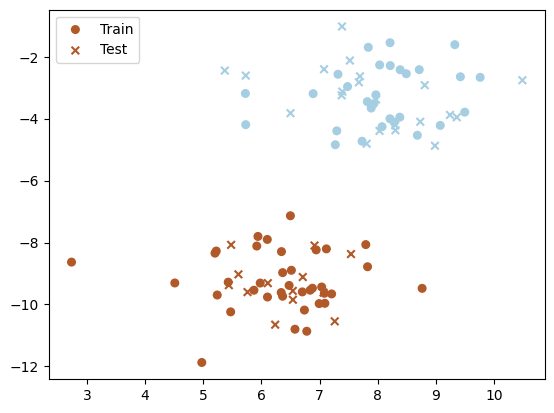

(66, 2) (66,) (34, 2) (34,) (1000000, 2)


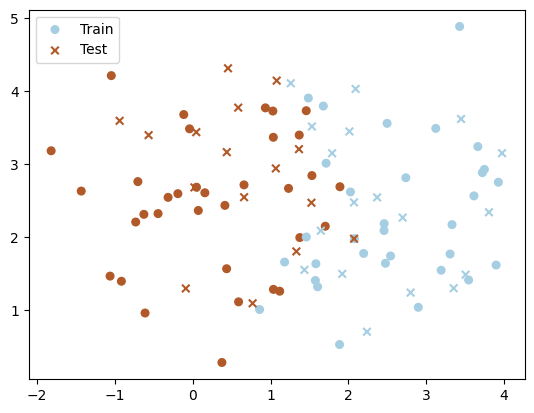

(266, 2) (266,) (134, 2) (134,) (1000000, 2)


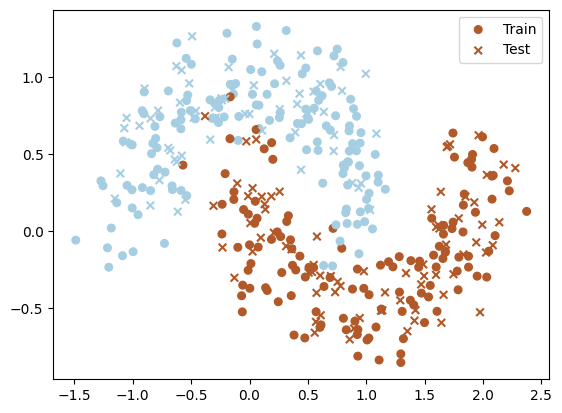

(133, 2) (133,) (67, 2) (67,) (1000000, 2)


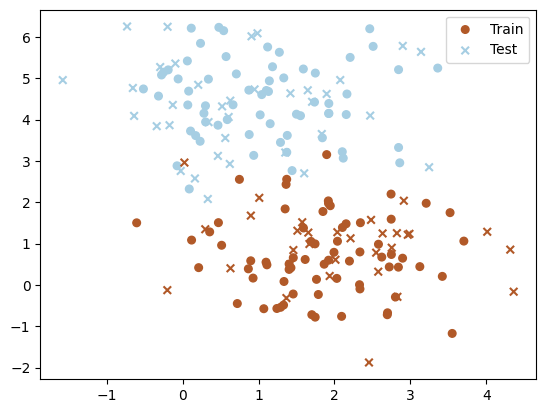

(333, 2) (333,) (167, 2) (167,) (1000000, 2)


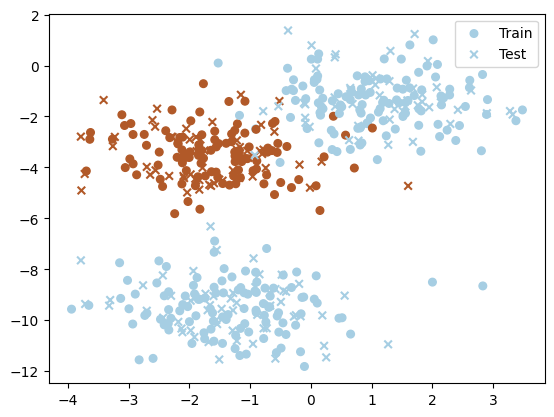

(666, 2) (666,) (334, 2) (334,) (1000000, 2)


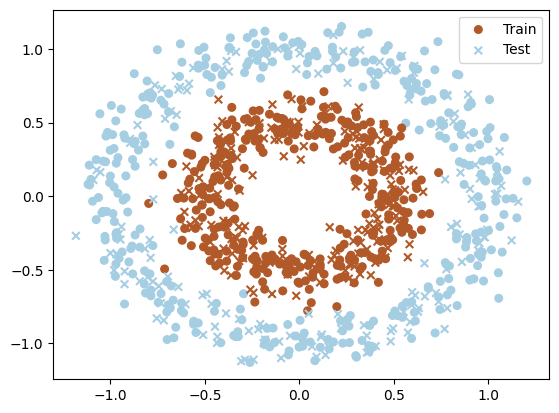

In [ ]:
for X_train,t_train,X_test,t_test,X_grid in [linear(),easy(),moons(),blobs(),three_blobs(),circles()]:

  print(X_train.shape,t_train.shape,X_test.shape,t_test.shape,X_grid.shape)
  plot_svm(X_train,t_train,X_test,t_test)

# Sección 1. Sklearn SVM - SVC:

Módulo Support Vector Machine de scikit-learn
(sklearn.svm.SVC) para entrenar clasificadores SVM.

¿Cómo se usan los métodos fit() y decision_function()?

¿Qué información proveen los atributos coef_, dual_coef_, n_support_ y support_vectors_?

¿Qué tipo de kernels acepta el módulo SVM de scikit-learn? ¿Cuáles son
sus parámetros y qué significan?

1. fit(X, y, sample_weight=None)  ajusta sv model de acuerdo a la data x de entremaiento y objetivo. sample reescala c por muestra


2.
* coef_ndarray de forma (n_classes * (n_classes - 1) / 2, n_features)
Weights assigned to the features when kernel="linear".

* dual_coef_ndarray of shape (n_classes -1, n_SV)
Dual coefficients del soporte vector en la funcion de decision, multiplicado por los targets. Para multiclase,coefficient for all 1-vs-1 classifiers. The layout of the coefficients in the multiclass case is somewhat non-trivial. See the multi-class section of the User Guide for details.

* support_vectors_ndarray of shape (n_SV, n_features)
Support vectors.

* n_support_ndarray of shape (n_classes,), dtype=int32
Number of support vectors for each class.

3. kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used.

# Sección 2: Uso

Use el módulo Support Vector Machine de scikit-learn (sklearn.svm.SVC) para entrenar una SVM de clasificación con kernel **lineal** y **C=1**.

Grafique:
1.   Los vectores de soporte
2.   La frontera de  decisión
3.   La margen

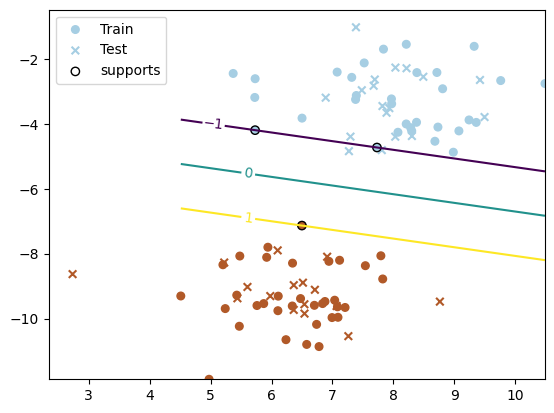

In [ ]:
from sklearn import svm

X_train,t_train,X_test,t_test,X_grid = linear()
clf = svm.SVC(kernel="linear")

clf.fit(X_train, t_train)

y_grid = clf.decision_function(X_grid) #Resultado de decision_function en X_grid

supports = clf.support_vectors_ # Resultado del atributo support_vectors_

boundaries = [-1,0,1] #Tres valores, uno para la margen izquierda, otro para la frontera y otro para la margen derecha

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

# Sección 3: Variando C
A partir la sección 2, reduzcamos el valor de la restricción $C$ paulatinamente hasta 0.01. Probar varios valores de $C\in[0.01,1]$.

Ademas, Grafique Los multiplicadores de lagrange del problema dual en un `stem` usando diferentes valores de $C$.

**NOTA**: Se debe hacer `reshape(-1,)` a los multiplicadores para que el método `stem` funcione.

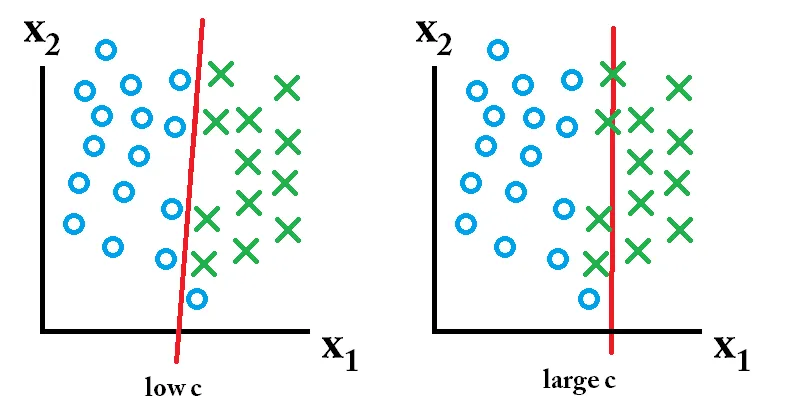

C es: 1


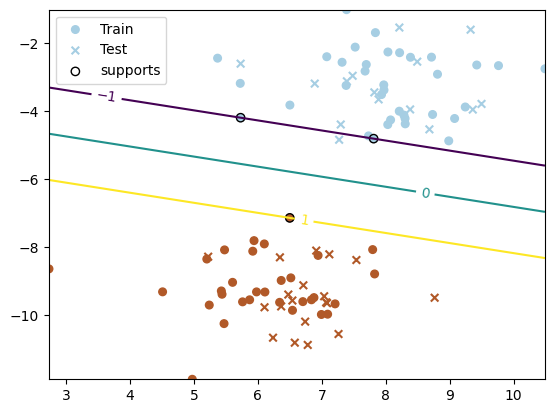

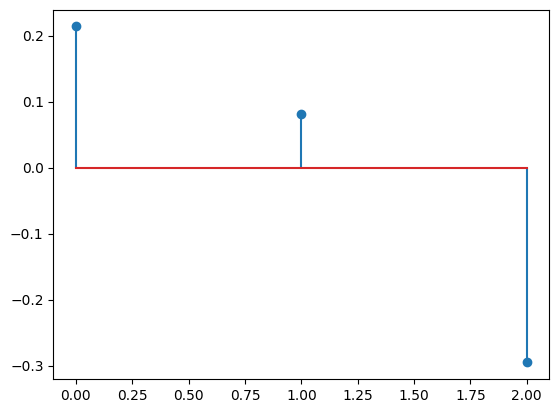

C es: 0.5


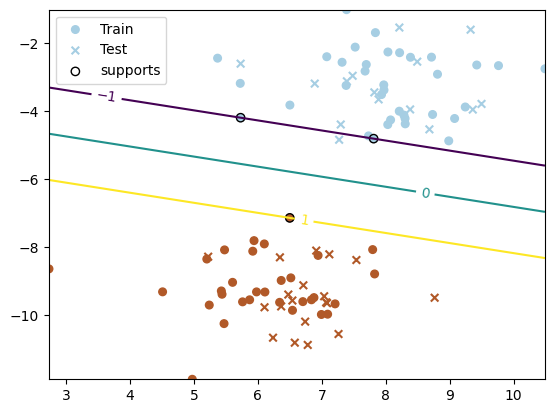

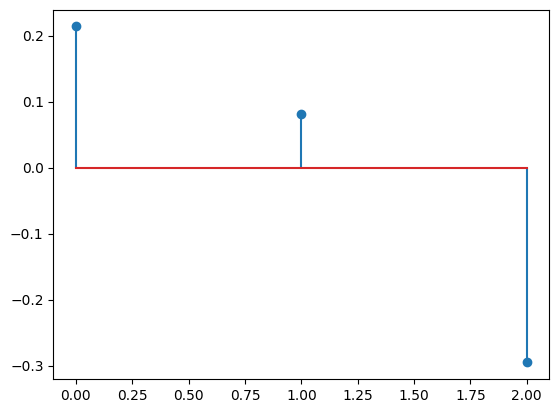

C es: 0.1


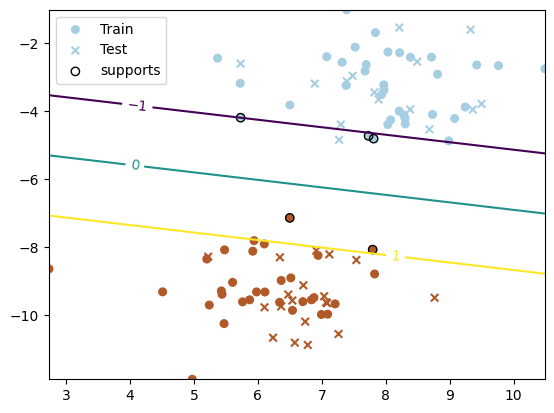

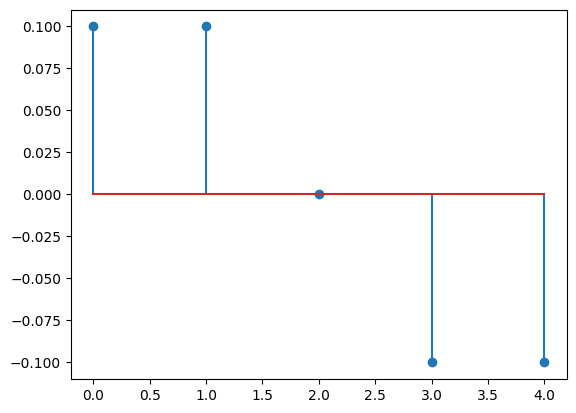

C es: 0.05


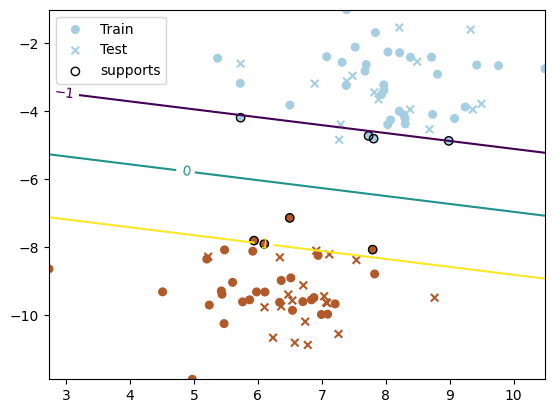

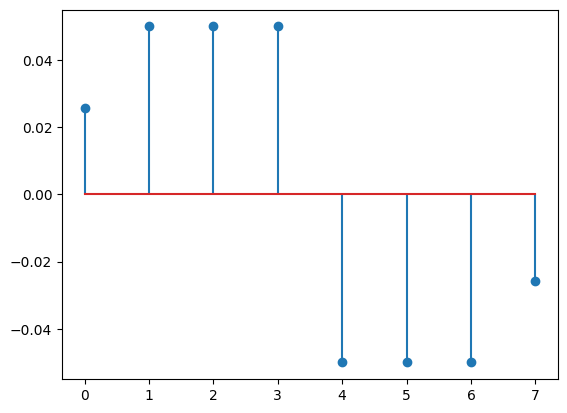

C es: 0.01


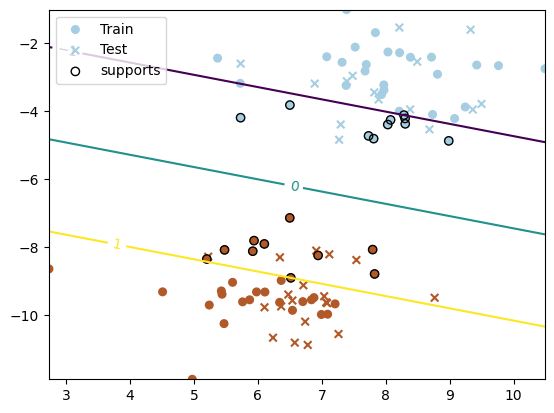

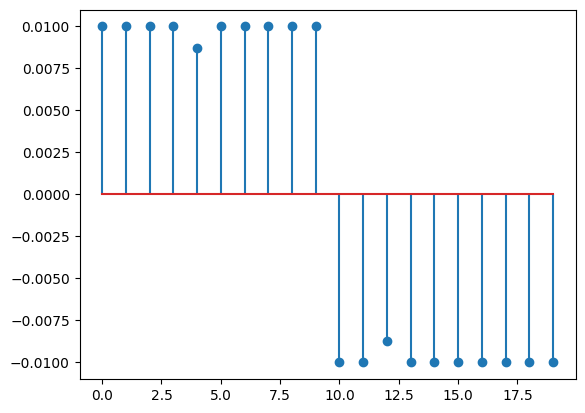

In [ ]:
X_train,t_train,X_test,t_test,X_grid = linear()
for i in [1, 0.5, 0.1, 0.05, 0.01]:
   print("C es:",i)
   clf = svm.SVC(kernel="linear", C=i)

   clf.fit(X_train, t_train)

   y_grid = clf.decision_function(X_grid) #Resultado de decision_function en X_grid

   supports = clf.support_vectors_ # Resultado del atributo support_vectors_

   boundaries = [-1,0,1] #Tres valores, uno para la margen izquierda, otro para la frontera y otro para la margen derecha

   plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

   #Cree a continación una gráfica para los multiplicadores de Lagrange

   lagrange = clf._dual_coef_
   plt.stem(lagrange.reshape(-1,))
   plt.show()

# Sección 4: SVM en la datos dummy
Para la base de datos cargada acontinuación, entrenaremos una `SVM` con kernel `rbf` y un valor de regularización `C=1`.

Graficamos:
*   La margen (con el método `decision_function`) para los datos `X_grid`.
*   Los vectores de soporte.

Cambiemos el factor de escala `gamma` de `1e-5` a `150`.

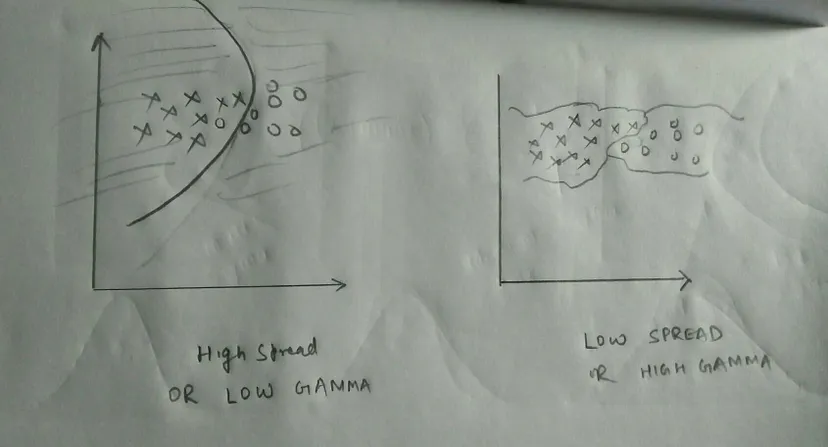

gamma:1e-05


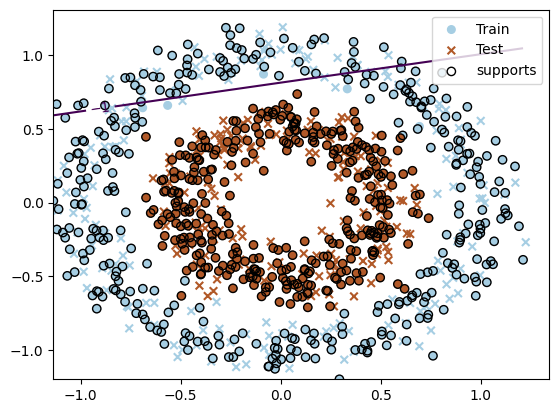

gamma:0.001


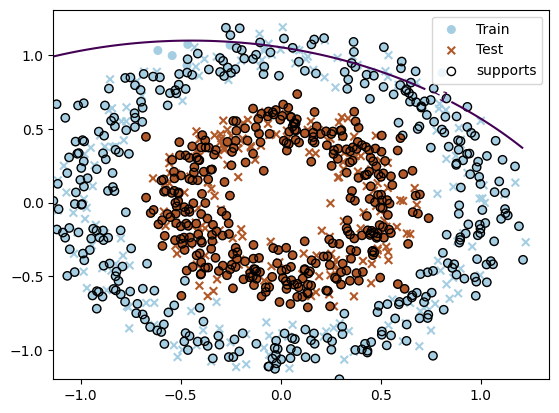

gamma:0.1


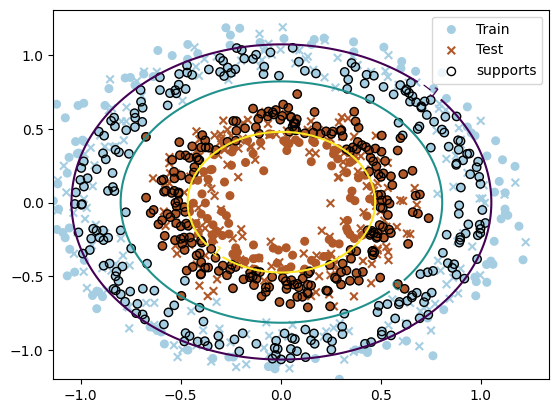

gamma:1


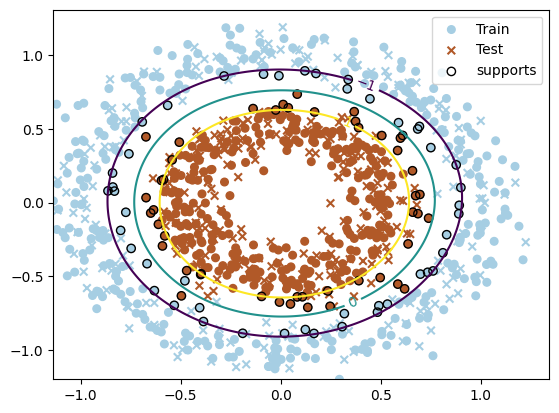

gamma:5


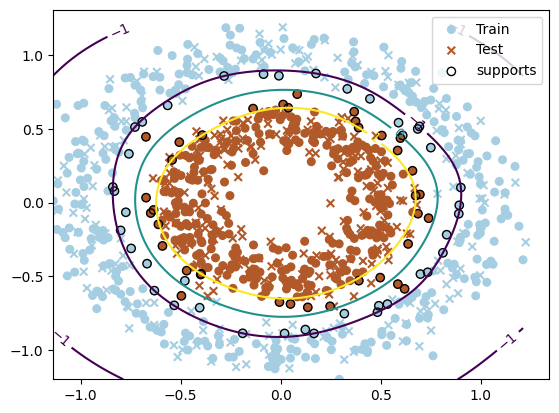

gamma:10


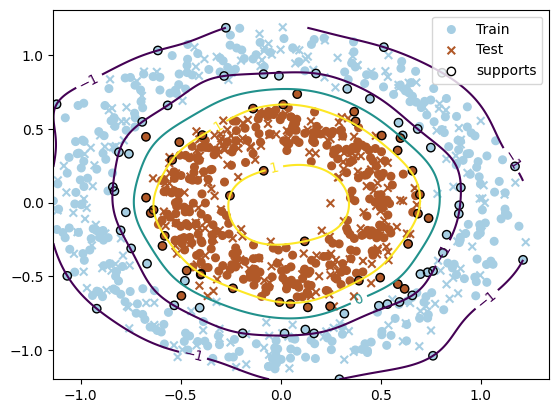

gamma:50


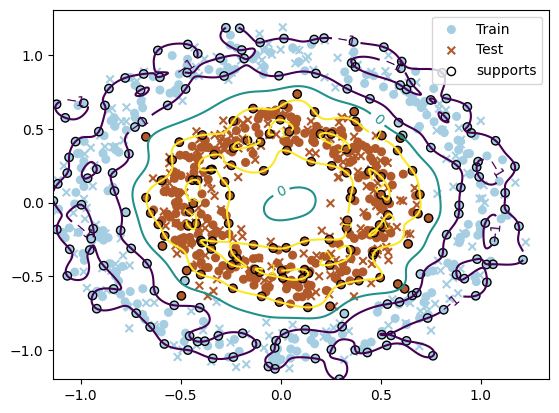

gamma:100


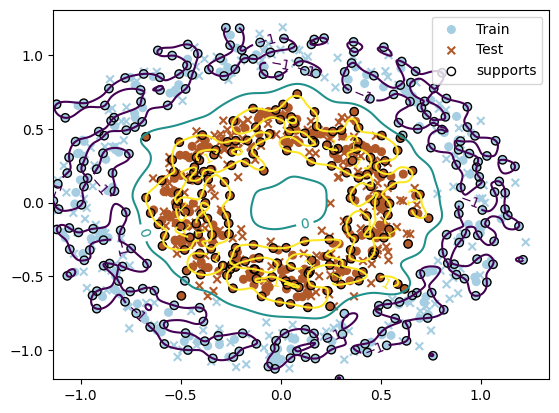

gamma:150


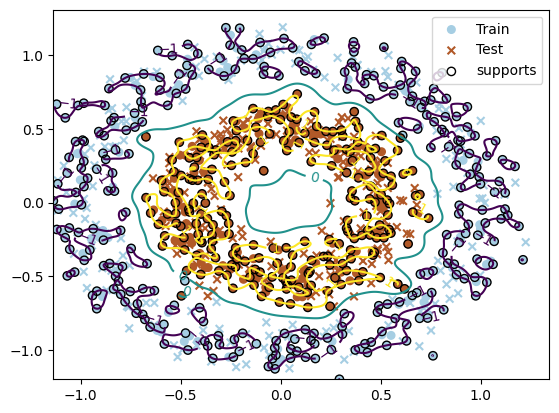

In [ ]:
X_train,t_train,X_test,t_test,X_grid = circles()

for gamma in [1e-5, 1e-3, 1e-1, 1, 5, 10, 50, 100, 150]: #Defina la lista de gammas a evaluar


  clf = svm.SVC(kernel="rbf",C=1,gamma=gamma)

  clf.fit(X_train, t_train)

  y_grid = clf.decision_function(X_grid) #Resultado de decision_function en X_grid

  supports = clf.support_vectors_ # Resultado del atributo support_vectors_

  print('gamma:{}'.format(gamma))

  plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

# Sección 5: Grid Search

Para cada una de las siguientes bases de datos:

* Entrenamos una SVM con **kernel lineal**  con el subconjunto de train.

* Entrenamos una SVM con **kernel RBF**  con el subconjunto de train.

* Ajustamos los parámetros C (para los dos kernels) y gamma (para el kernel RBF) mediante una búsqueda en rejilla en validación cruzada (`sklearn.model_selection.GridSearchCV`).

* Graficamos para los dos kernels la frontera de clasificación, las márgenes y los vectores de soporte.

* Imprimimos para los dos kernels el acierto de clasificación (`score`) en el subconjunto de test.

In [ ]:
from sklearn.model_selection import GridSearchCV

def svm5(X_train,t_train,X_test,t_test,X_grid):
  C = [0.001, 0.01, 0.1, 0.5, 1, 5, 10] #definimos los C a probar
  gamma = [0.001, 0.01, 0.1, 0.5, 1, 5, 10] #definimos gamma para rbf a probar

  # Lineal
  parameters = {'C':C}
  svc = svm.SVC(kernel="linear")
  clf = GridSearchCV(svc, parameters)
  clf.fit(X_train, t_train)

  y_grid = clf.best_estimator_.decision_function(X_grid)
  boundaries = [-1,0,1]
  supports = clf.best_estimator_.support_vectors_
  score = clf.best_estimator_.score(X_test, t_test)

  print(' lineal Score:', score)
  plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

  # RBF
  parameters = {'C':C, 'gamma':gamma}
  svc = svm.SVC(kernel="rbf")
  clf = GridSearchCV(svc, parameters)
  clf.fit(X_train, t_train)

  y_grid = clf.best_estimator_.decision_function(X_grid)
  boundaries = [-1,0,1]
  supports = clf.best_estimator_.support_vectors_
  score = clf.best_estimator_.score(X_test, t_test)

  print(' lineal Score:', score)
  plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

 lineal Score: 1.0


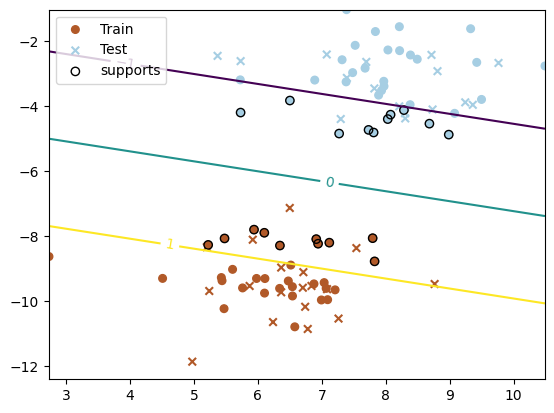

 lineal Score: 1.0


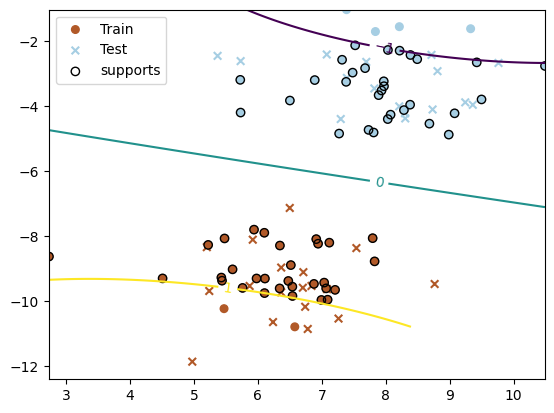

In [ ]:
X_train,t_train,X_test,t_test,X_grid = linear()
svm5(X_train,t_train,X_test,t_test,X_grid)


 lineal Score: 0.8529411764705882


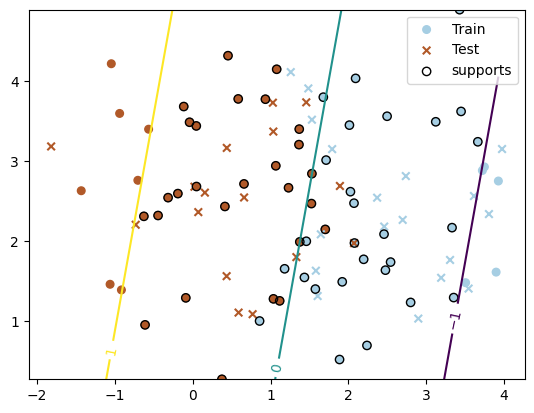

 lineal Score: 0.8235294117647058


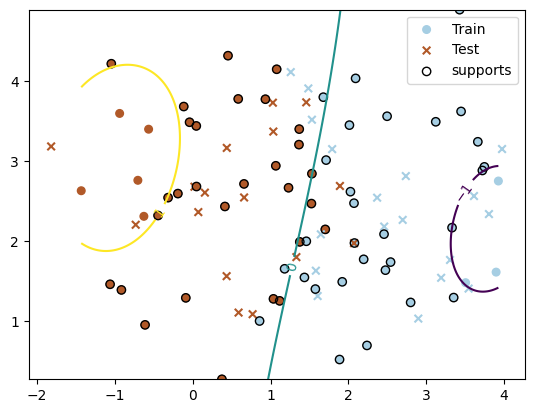

In [ ]:
X_train,t_train,X_test,t_test,X_grid = easy()
svm5(X_train,t_train,X_test,t_test,X_grid)

 lineal Score: 0.8656716417910447


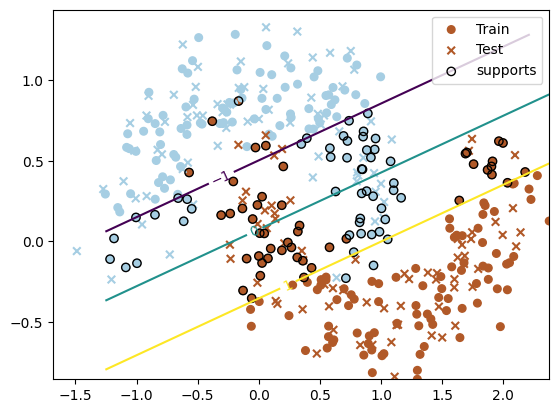

 lineal Score: 0.9626865671641791


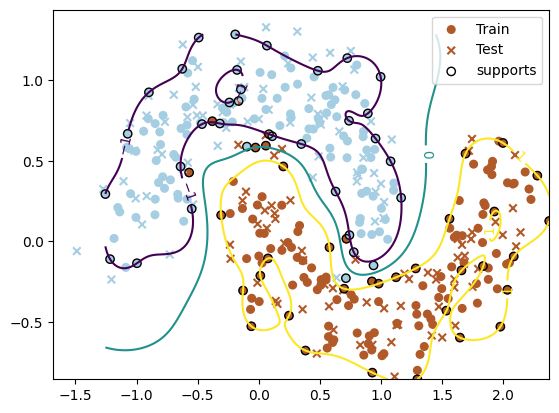

In [ ]:
X_train,t_train,X_test,t_test,X_grid = moons()
svm5(X_train,t_train,X_test,t_test,X_grid)

 lineal Score: 0.9850746268656716


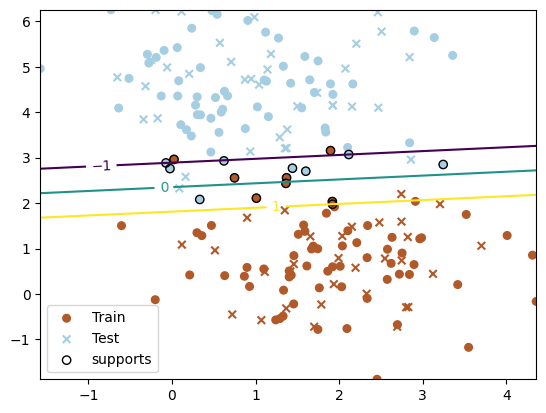

 lineal Score: 1.0


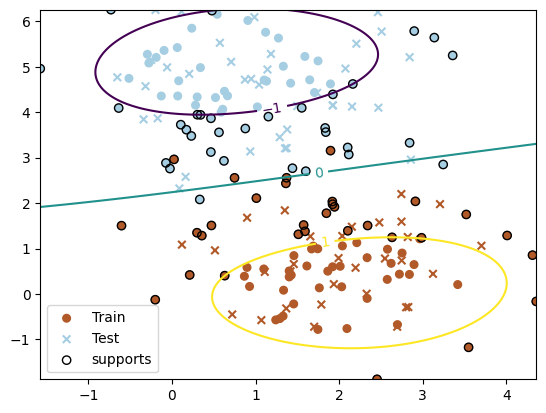

In [ ]:
X_train,t_train,X_test,t_test,X_grid = blobs()
svm5(X_train,t_train,X_test,t_test,X_grid)


 lineal Score: 0.8502994011976048


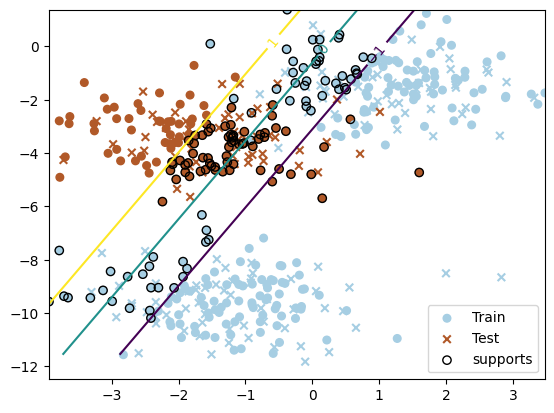

 lineal Score: 0.9700598802395209


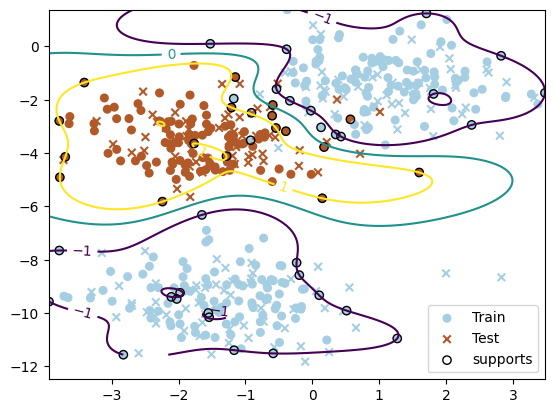

In [ ]:
X_train,t_train,X_test,t_test,X_grid = three_blobs()
svm5(X_train,t_train,X_test,t_test,X_grid)

 lineal Score: 0.5538922155688623


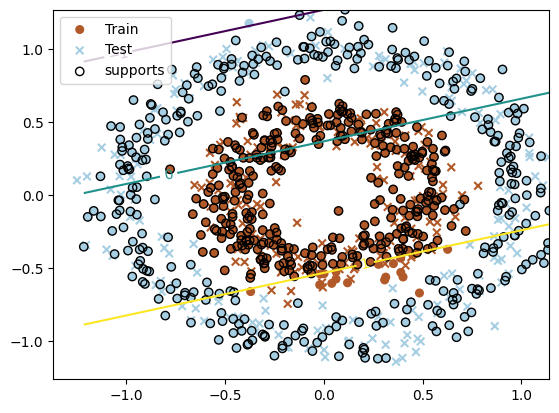

 lineal Score: 0.9850299401197605


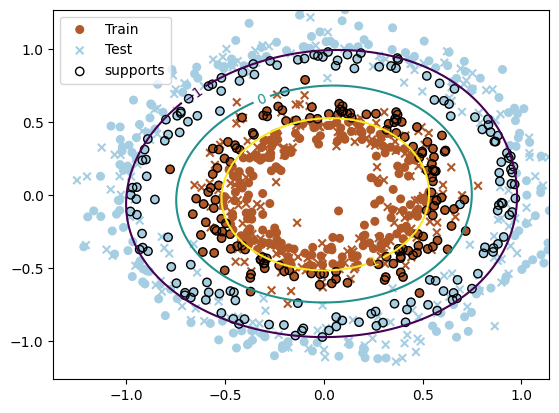

In [ ]:
X_train,t_train,X_test,t_test,X_grid = circles()
svm5(X_train,t_train,X_test,t_test,X_grid)

# Aplicación: Face Recognition

Usaremos faces en el wild dataset, el cual consiste de miles de fotos etiquetadas de figuras publicas

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Veamos algunas de las faces:

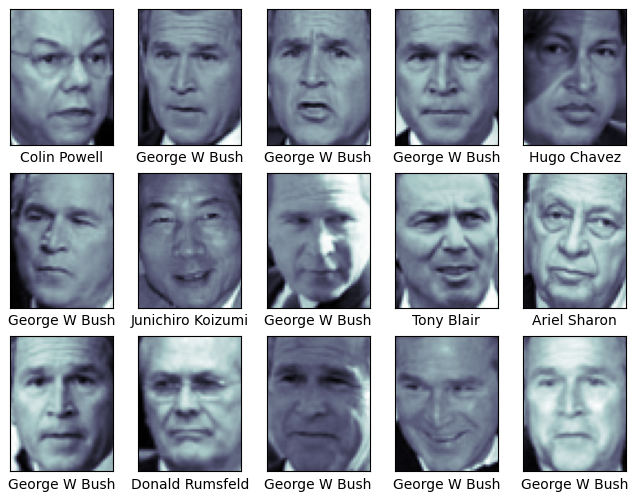

In [ ]:
fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Cada imagen contiene 62x47, alrededor de 3000 pixeles

Podemos proceder usando cada pixel como una caracteristica, pero suele ser mas efectivo usar algun preprocesador que extraiga caracteristicas significativas. (usaremos PCA princiapl component analysis) para extraer 150 componentes fundamentales en nuestra svm.

usamos pipeline para que ejecute primer pca, despues svc

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True,
          svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Split de datos

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Finalmente, podemos usar la búsqueda en rejilla con validación cruzada para explorar combinaciones de parámetros. Aquí ajustaremos C (que controla la dureza del margen) y gamma (que controla el tamaño del núcleo de la función de base radial), y determinaremos el mejor modelo:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 2s, sys: 41.2 s, total: 1min 43s
Wall time: 1min 17s
{'svc__C': 5, 'svc__gamma': 0.001}


Los valores óptimos caen hacia el centro de nuestra rejilla; si cayeran en los extremos, querríamos expandir la rejilla para asegurarnos de haber encontrado el verdadero óptimo.

Ahora, con este modelo validado cruzadamente, podemos predecir las etiquetas para los datos de prueba, que el modelo aún no ha visto:

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Veamos algunas de las imágenes de prueba junto con sus valores predichos

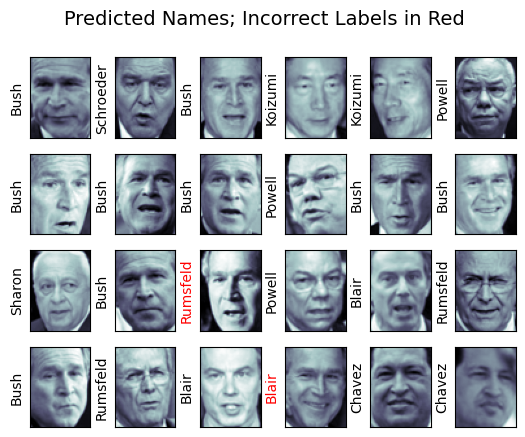

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

De esta pequeña muestra, nuestro estimador óptimo etiquetó incorrectamente pocos rostros.

Podemos tener una mejor idea del rendimiento de nuestro estimador utilizando el informe de clasificación, que lista las estadísticas de recuperación etiqueta por etiqueta:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



tambien podremos ver la matrix de confusion

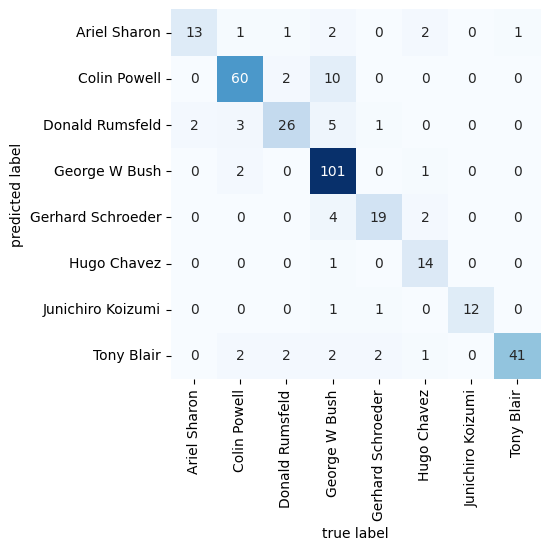

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');